<a href="https://colab.research.google.com/github/User-Galih/capstone-project-bengkod/blob/main/Capstone_Project_14359.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Load dataset dari Google Drive
file_path = '/content/drive/MyDrive/Semester 6/BengKod/ObesityDataSet.csv'  # Sesuaikan dengan lokasi file di Google Drive
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [3]:
# Menampilkan semua nilai unik dari semua kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    #Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Kolom: Age
Nilai unik:
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']
Total nilai unik: 1394
Jumlah data kosong (NaN): 14, jumlah '?' sebagai missing: 8

Kolom: Gender
Nilai unik:
['Female' 'Male' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 9, jumlah '?' sebagai missing: 13

Kolom: Height
Nilai unik:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']
Total nilai unik: 1562
Jumlah data kosong (NaN): 12, jumlah '?' sebagai missing: 10

Kolom: Weight
Nilai unik:
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']
Total nilai unik: 1518
Jumlah data kosong (NaN): 11, jumlah '?' sebagai missing: 8

Kolom: CALC
Nilai unik:
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
Total nilai unik: 5
Jumlah data kosong (NaN): 5, jumlah '?' sebagai missing: 15

Kolom: FAVC
Nilai unik:
['no' 'yes' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 11, jumlah '?' sebagai missing: 11

Kolom: FCVC
Nilai unik:
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979

In [4]:
# 1. Konversi kolom yang seharusnya numerik
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')  # Konversi ke numerik, ganti error jadi NaN


In [5]:
# 3. Tampilkan beberapa baris pertama untuk memastikan konversi tipe data berhasil
print("Beberapa baris pertama dari dataset:")
print(df.head())

Beberapa baris pertama dari dataset:
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

 

In [6]:
# 4. Informasi umum dataset
print("\nInformasi Umum Dataset:")
print(df.info())


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF      

In [7]:
# 5. Deskripsi data
print("\nDeskripsi Statistik Dataset:")
print(df.describe(include='all'))


Deskripsi Statistik Dataset:
                Age Gender       Height       Weight       CALC  FAVC  \
count   2089.000000   2102  2089.000000  2092.000000       2106  2100   
unique          NaN      3          NaN          NaN          5     3   
top             NaN   Male          NaN          NaN  Sometimes   yes   
freq            NaN   1056          NaN          NaN       1386  1844   
mean      24.717928    NaN     1.706623    88.608184        NaN   NaN   
std        8.391323    NaN     0.117700    36.154617        NaN   NaN   
min       14.000000    NaN     1.450000    39.000000        NaN   NaN   
25%       19.955257    NaN     1.630000    66.000000        NaN   NaN   
50%       22.814657    NaN     1.701284    83.000000        NaN   NaN   
75%       26.000000    NaN     1.770000   108.055736        NaN   NaN   
max      106.441252    NaN     2.853986   441.131078        NaN   NaN   

               FCVC          NCP   SCC SMOKE         CH2O  \
count   2093.000000  2089.000000

In [8]:
# 6. Cek keberadaan missing values
print("\nMissing Values:")
print(df.isnull().sum())
# 7. Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())
# 8. Cek nilai unik per kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    # Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Missing Values:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah Data Duplikat:
18

Kolom: Age
Nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
Total nilai unik: 1393
Jumlah data kosong (NaN): 22, jumlah '?' sebagai missing: 0

Kolom: Gender
Nilai unik:
['Female' 'Male' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 9, jumlah '?' sebagai missing: 13

Kolom: H

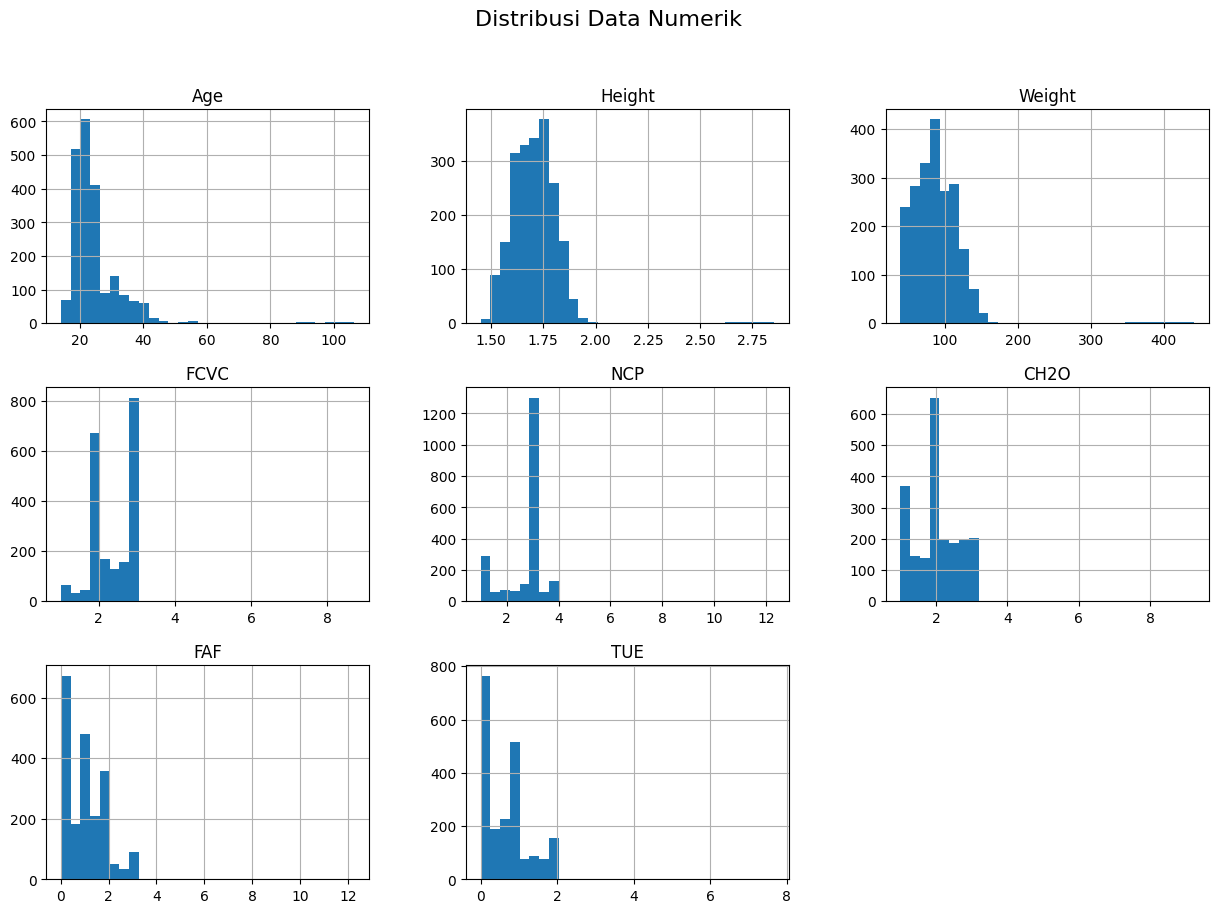

In [9]:
# 9. Visualisasi distribusi data numerik
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribusi Data Numerik", fontsize=16)
plt.show()

<ipython-input-10-42fcc37abd72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='Set2')


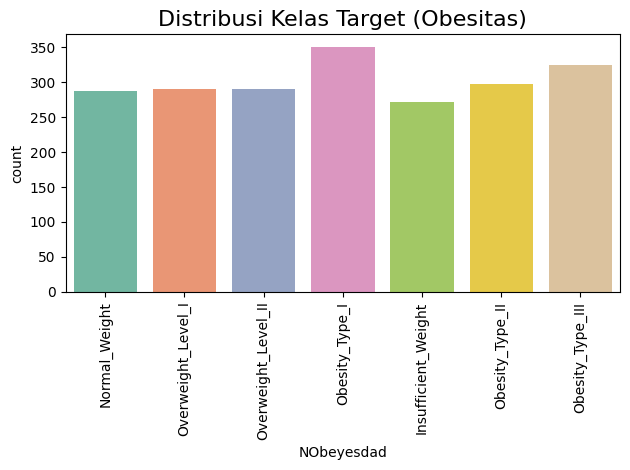

In [10]:
# 10. Visualisasi distribusi kategori target (NObeyesdad)
sns.countplot(data=df, x='NObeyesdad', palette='Set2')
plt.title('Distribusi Kelas Target (Obesitas)', fontsize=16)
plt.xticks(rotation=90)  # Rotasi label menjadi vertikal
plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.show()


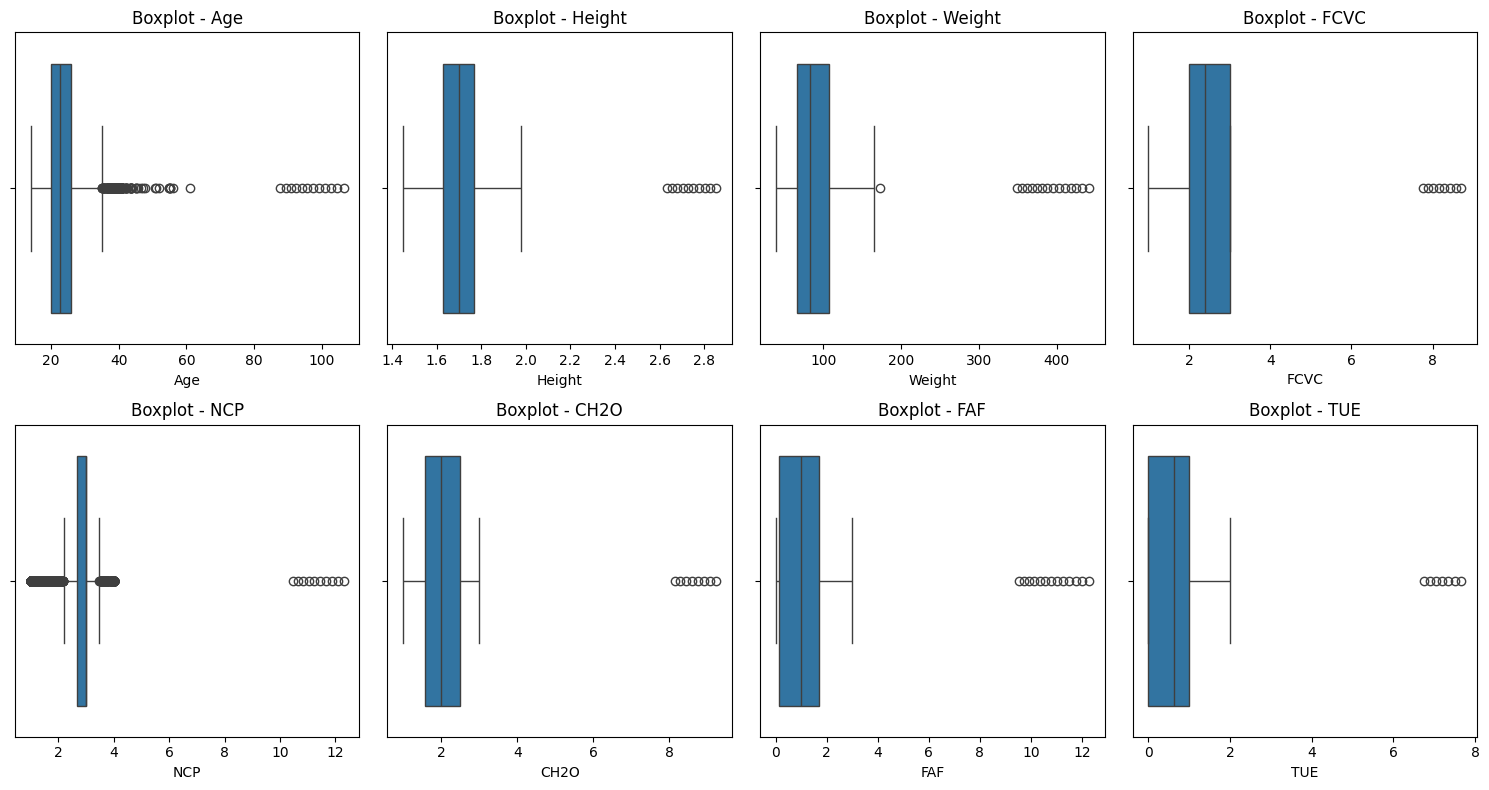

In [11]:
# 11. Deteksi outlier menggunakan boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [12]:
# 12. Keseimbangan Data - Perbandingan jumlah tiap kategori target
print("\nKeseimbangan Data (NObeyesdad):")
print(df['NObeyesdad'].value_counts())


Keseimbangan Data (NObeyesdad):
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


# 2. Preprocessing

In [13]:
import numpy as np

# 1. Tangani missing values (termasuk nilai '?')

# Ganti semua nilai '?' menjadi np.nan (agar bisa diproses sebagai missing value)
df.replace('?', np.nan, inplace=True)

# Tentukan kolom numerik
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Isi NaN pada kolom numerik dengan median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Tentukan kolom kategorikal (selain kolom numerik)
categorical_columns = [col for col in df.columns if col not in numerical_columns]

# Isi NaN pada kolom kategorikal dengan modus (most frequent value)
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [14]:
print("Jumlah data awal:", len(df))
print("Jumlah data duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah data setelah duplikat dihapus:", len(df))


Jumlah data awal: 2111
Jumlah data duplikat: 20
Jumlah data setelah duplikat dihapus: 2091


In [15]:
# 6. Cek keberadaan missing values
print("\nMissing Values:")
print(df.isnull().sum())
# 7. Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())
# 8. Cek nilai unik per kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    # Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Missing Values:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Jumlah Data Duplikat:
0

Kolom: Age
Nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
Total nilai unik: 1393
Jumlah data kosong (NaN): 0, jumlah '?' sebagai missing: 0

Kolom: Gender
Nilai unik:
['Female' 'Male']
Total nilai unik: 2
Jumlah data kosong (NaN): 0, jumlah '?' sebagai missing: 0

Kolom: Height
Nilai unik:
[1.62     

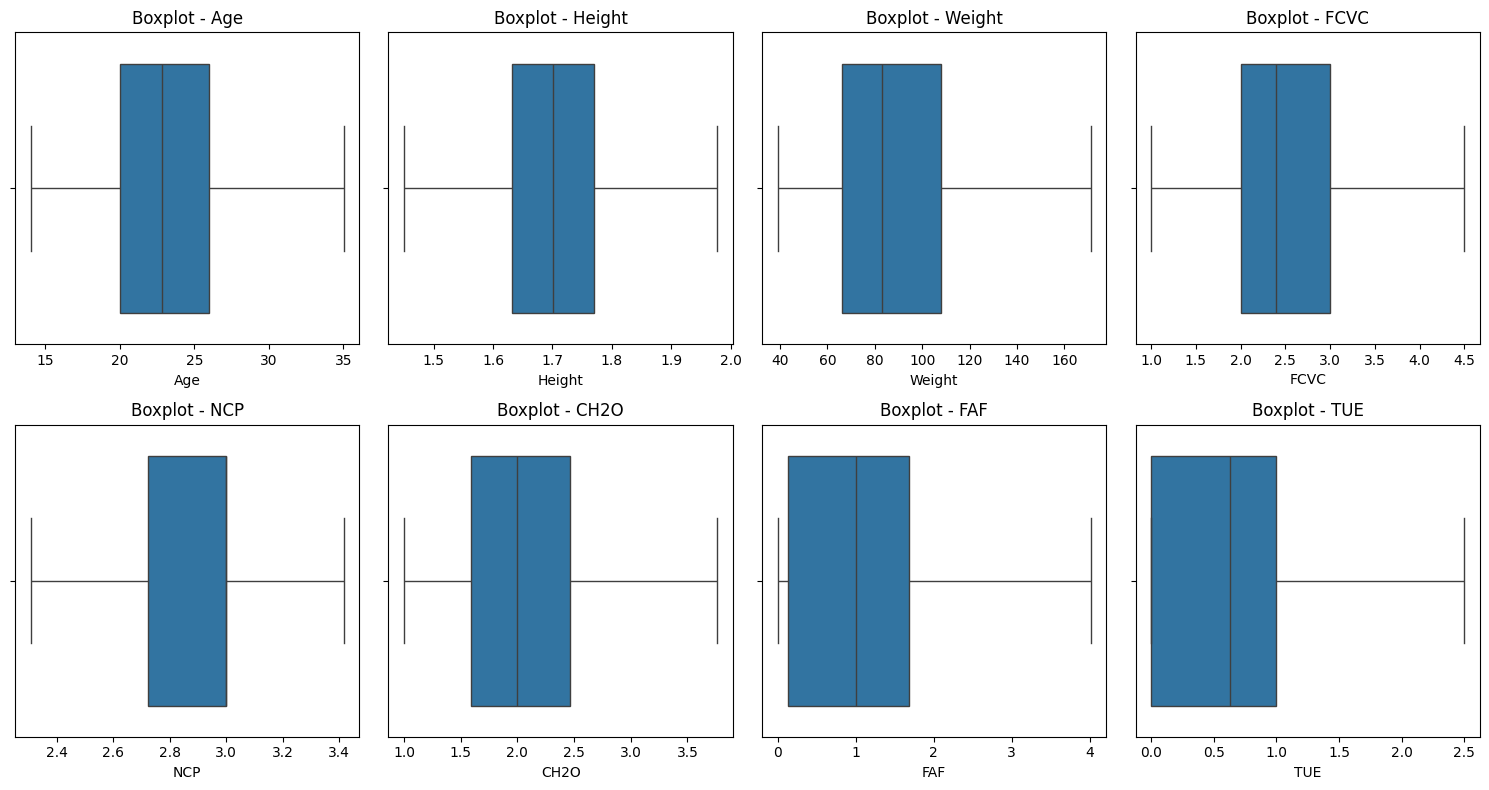

In [16]:
# 3. Tangani outlier (gunakan IQR method untuk kolom numerik)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Menampilkan boxplot setelah penanganan outlier
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [17]:
print("\nInformasi Umum Dataset:")
print(df.info())


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2091 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2091 non-null   float64
 1   Gender                          2091 non-null   object 
 2   Height                          2091 non-null   float64
 3   Weight                          2091 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2091 non-null   object 
 6   FCVC                            2091 non-null   float64
 7   NCP                             2091 non-null   float64
 8   SCC                             2091 non-null   object 
 9   SMOKE                           2091 non-null   object 
 10  CH2O                            2091 non-null   float64
 11  family_history_with_overweight  2091 non-null   object 
 12  FAF           

In [18]:
# 4. Encoding fitur dan target

from sklearn.preprocessing import LabelEncoder

# Fitur kategorikal selain target yang perlu di-encode dengan One-Hot
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']

# One-Hot Encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Encode target 'NObeyesdad' menggunakan LabelEncoder
label_encoder = LabelEncoder()
df_encoded['NObeyesdad'] = label_encoder.fit_transform(df_encoded['NObeyesdad'])


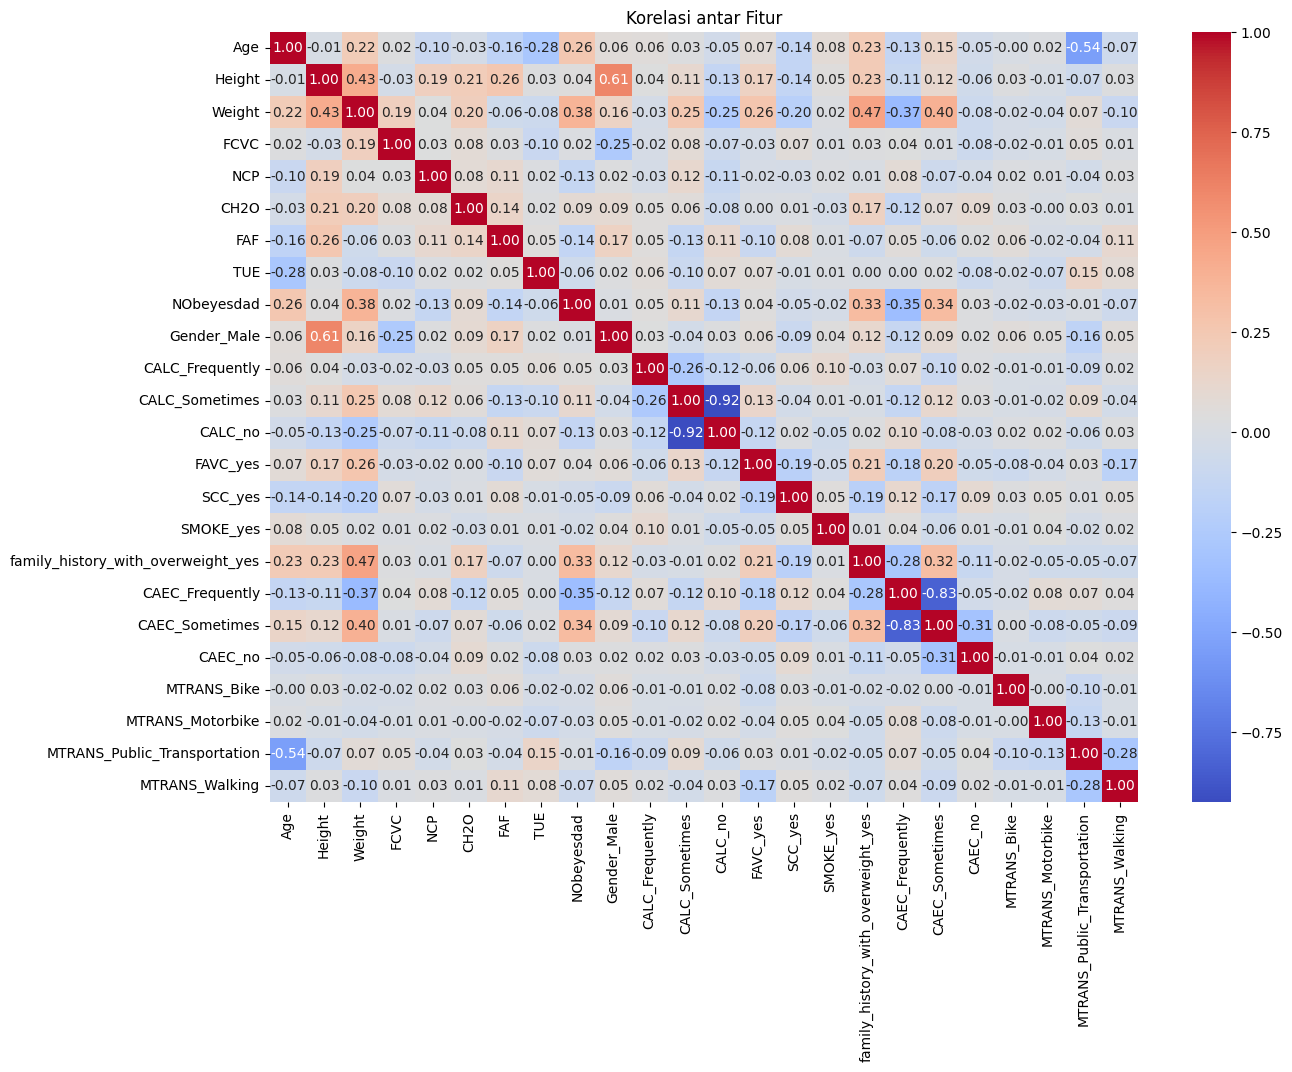

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 5. Cek korelasi antar fitur
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar Fitur")
plt.show()


In [20]:
# Korelasi dengan target (asumsikan 'NObeyesdad' sudah encoded)
cor_target = correlation_matrix['NObeyesdad'].abs().sort_values(ascending=False)
print("Korelasi fitur dengan target:")
print(cor_target)

# Tentukan threshold korelasi minimum, misal 0.1 (bisa diatur sesuai konteks)
selected_features = cor_target[cor_target > 0.1].index.drop('NObeyesdad').tolist()

print("\nFitur yang dipilih berdasarkan korelasi > 0.1:")
print(selected_features)


Korelasi fitur dengan target:
NObeyesdad                            1.000000
Weight                                0.378161
CAEC_Frequently                       0.347825
CAEC_Sometimes                        0.336717
family_history_with_overweight_yes    0.333460
Age                                   0.260521
FAF                                   0.137807
CALC_no                               0.130428
NCP                                   0.126316
CALC_Sometimes                        0.109467
CH2O                                  0.086476
MTRANS_Walking                        0.071324
TUE                                   0.062906
SCC_yes                               0.050309
CALC_Frequently                       0.048186
Height                                0.041737
FAVC_yes                              0.040055
MTRANS_Motorbike                      0.034271
CAEC_no                               0.027254
SMOKE_yes                             0.022940
FCVC                          

<ipython-input-21-42fcc37abd72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='Set2')


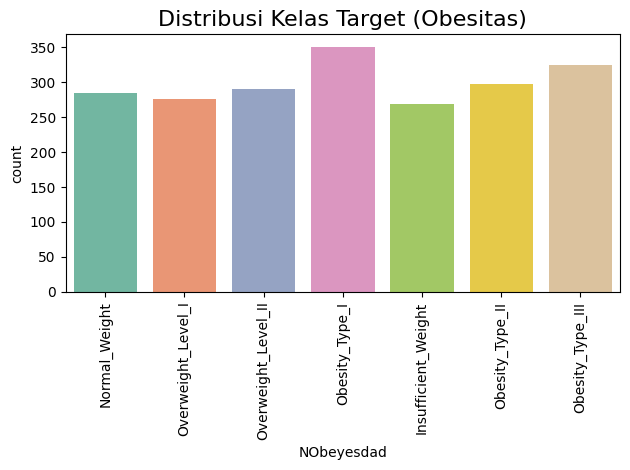

In [21]:
# 10. Visualisasi distribusi kategori target (NObeyesdad)
sns.countplot(data=df, x='NObeyesdad', palette='Set2')
plt.title('Distribusi Kelas Target (Obesitas)', fontsize=16)
plt.xticks(rotation=90)  # Rotasi label menjadi vertikal
plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.show()


In [22]:
from imblearn.over_sampling import SMOTE

X = df_encoded[selected_features]
y = df_encoded['NObeyesdad']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Sebelum SMOTE: {y.value_counts().to_dict()}")
print(f"Setelah SMOTE: {pd.Series(y_resampled).value_counts().to_dict()}")


Sebelum SMOTE: {2: 351, 4: 324, 3: 297, 6: 290, 1: 284, 5: 276, 0: 269}
Setelah SMOTE: {1: 351, 5: 351, 6: 351, 2: 351, 0: 351, 3: 351, 4: 351}


<ipython-input-23-b30c320eff81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2')


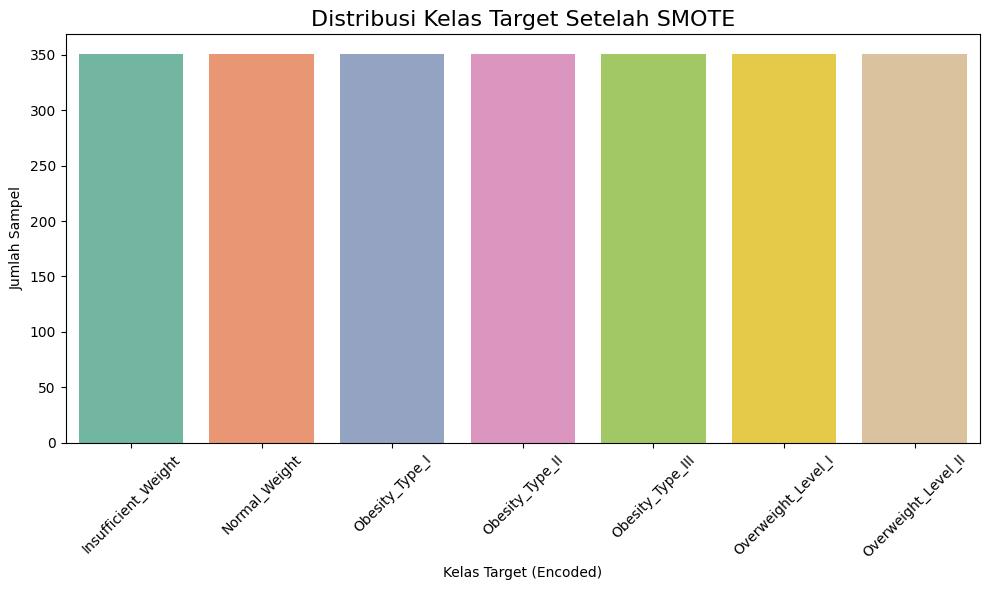

In [23]:
# Visualisasi distribusi kategori target setelah SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Distribusi Kelas Target Setelah SMOTE', fontsize=16)
plt.xlabel('Kelas Target (Encoded)')
plt.ylabel('Jumlah Sampel')
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['Age', 'Weight', 'Height', 'FAF', 'NCP', 'CH2O', 'FCVC', 'TUE']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [28]:
# Tampilkan beberapa baris pertama dari DataFrame setelah normalisasi
print("\nDataFrame setelah Normalisasi (Kolom Numerik):")
print(df.head())

# Tampilkan deskripsi statistik dari kolom numerik setelah normalisasi
print("\nDeskripsi Statistik Kolom Numerik setelah Normalisasi:")
print(df[numerical_features].describe())


DataFrame setelah Normalisasi (Kolom Numerik):
        Age  Gender    Height    Weight        CALC FAVC      FCVC    NCP  \
0  0.333012  Female  0.322218  0.189153          no   no  0.285714  0.625   
1  0.333012  Female  0.132678  0.128624   Sometimes   no  0.571429  0.625   
2  0.428158    Male  0.663390  0.287513  Frequently   no  0.285714  0.625   
3  0.618450    Male  0.663390  0.363174  Frequently   no  0.571429  0.625   
4  0.380585    Male  0.625482  0.384360   Sometimes   no  0.285714  0.000   

   SCC SMOKE      CH2O family_history_with_overweight       FAF  TUE  \
0   no    no  0.361868                            yes  0.000000  0.4   
1  yes   yes  0.723737                            yes  0.747575  0.0   
2   no    no  0.361868                            yes  0.498383  0.4   
3   no    no  0.361868                             no  0.498383  0.0   
4   no    no  0.361868                             no  0.000000  0.0   

        CAEC                 MTRANS           NObeyesdad

# **Kesimpulan Tahap Preprocessing**
Seleksi Fitur

Berdasarkan korelasi dengan target NObeyesdad, fitur yang memiliki korelasi > 0.1 dipilih untuk digunakan dalam model.

Fitur dengan korelasi rendah (< 0.1) diabaikan karena kontribusinya dianggap kurang signifikan untuk prediksi.

Pemilihan fitur ini membantu mengurangi dimensi data, mempercepat pelatihan model, dan mengurangi risiko overfitting.

Encoding Fitur Kategorikal

Fitur kategorikal yang terpilih di-encode menggunakan teknik One-Hot Encoding agar bisa digunakan dalam model machine learning.

Target NObeyesdad di-encode menggunakan LabelEncoder untuk mengubah label kelas menjadi angka.

Penanganan Ketidakseimbangan Data

Jika terdapat ketidakseimbangan kelas (class imbalance), data telah diatasi menggunakan teknik resampling (misal SMOTE, RandomOverSampler) agar model tidak bias ke kelas mayoritas.

Ini penting agar model dapat belajar dengan baik dari semua kelas.

Normalisasi Data

Fitur numerik yang terpilih dinormalisasi ke rentang 0-1 menggunakan Min-Max Scaling, karena data sudah bersih dari outlier sehingga normalisasi cocok digunakan.

Normalisasi membantu model konvergen lebih cepat dan mencegah fitur dengan skala besar mendominasi model.

Hasil Akhir

Data sudah siap dipakai untuk tahap pelatihan model machine learning dengan fitur yang lebih relevan dan skala fitur yang seragam.

Proses ini meningkatkan kualitas data sehingga model lebih akurat dan efisien.

# **PEMODELAN**

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.82      0.81      0.81        57
           2       0.89      0.90      0.89        70
           3       0.98      0.92      0.95        60
           4       0.98      0.97      0.98        65
           5       0.79      0.84      0.81        55
           6       0.89      0.93      0.91        58

    accuracy                           0.90       419
   macro avg       0.90      0.90      0.90       419
weighted avg       0.90      0.90      0.90       419



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.80      0.98      0.88        57
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        54
           1       0.77      0.60      0.67        57
           2       0.80      0.81      0.81        70
           3       0.85      0.95      0.90        60
           4       0.98      0.98      0.98        65
           5       0.64      0.65      0.65        55
           6       0.66      0.60      0.63        58

    accuracy                           0.80       419
   macro avg       0.79      0.80      0.79       419
weighted avg       0.80      0.80      0.79       419





/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.91      0.91      0.91        57
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.91      0.89      0.90        55
           6       0.96      0.95      0.96        58

    accuracy                           0.95       419
   macro avg       0.95      0.95      0.95       419
weighted avg       0.95      0.95      0.95       419



Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.72      0.81      0.77        54
           1       0.58      0.46      0.51        57
           2       0.48      0.36      0.41        70
           3       0.89      0.55      0.68        60
           4       0.65      0.98      0.78        65
        

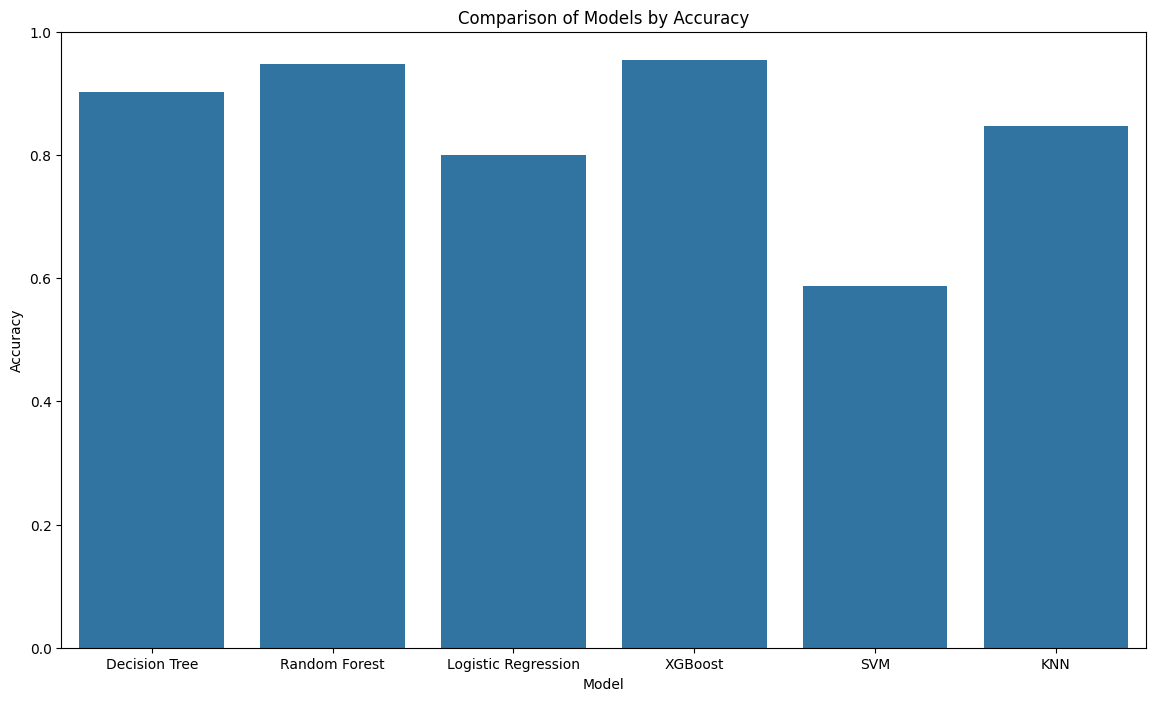

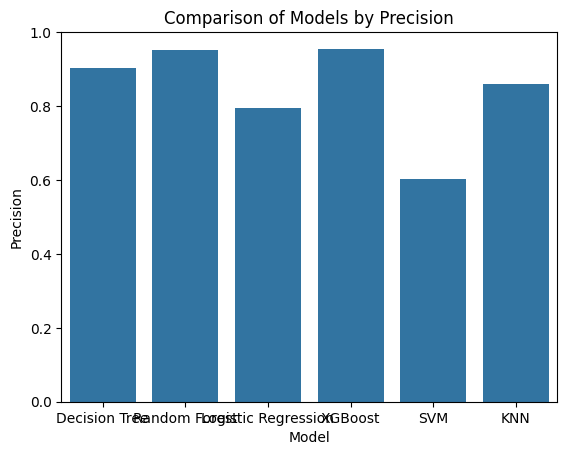

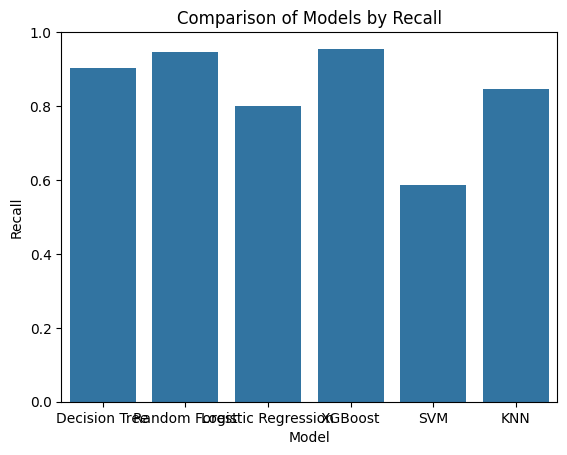

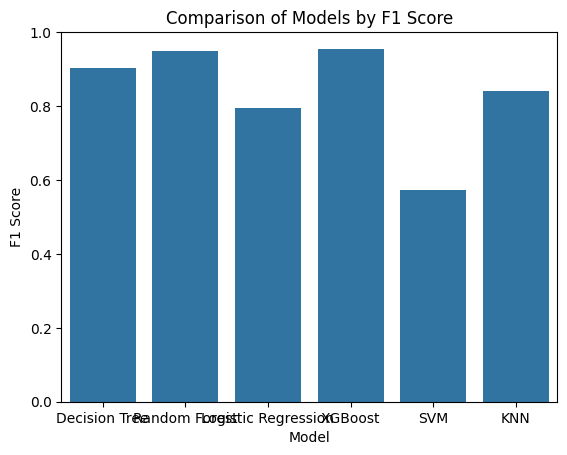

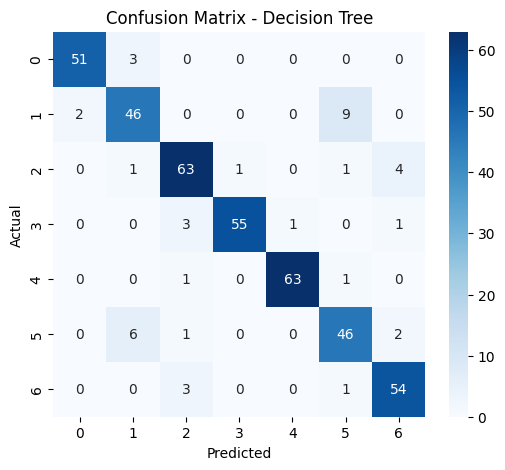

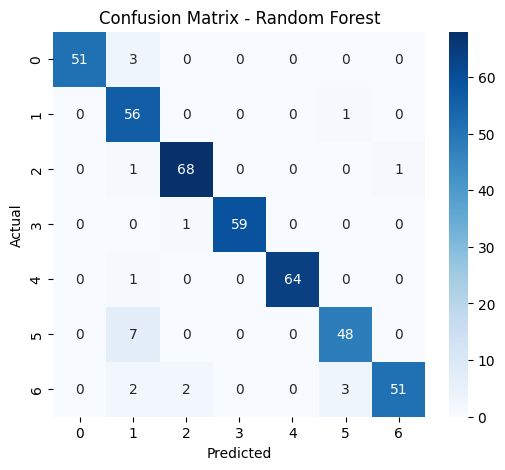

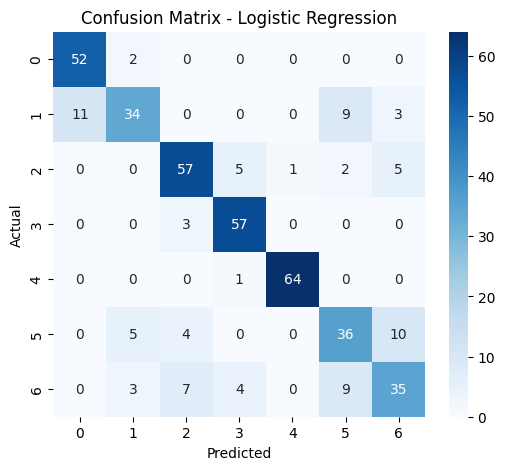

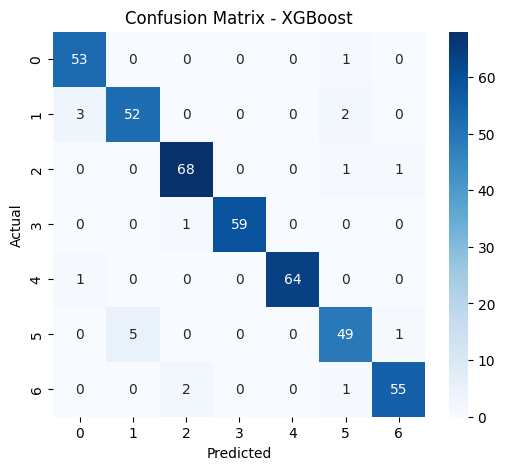

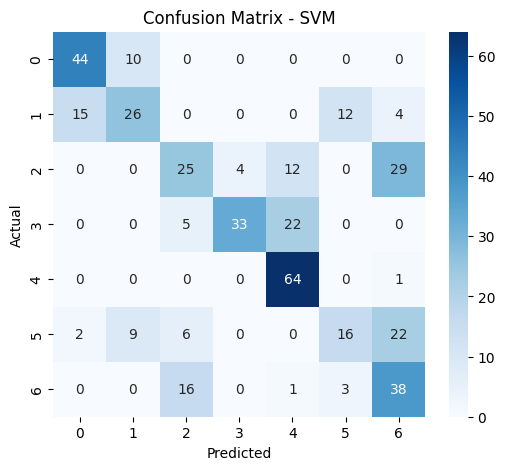

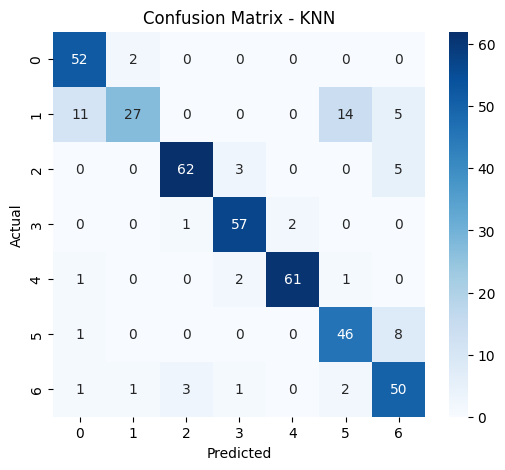

In [31]:
# Pisahkan fitur dan target
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# Split data train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definisikan model
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    })

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

# Buat DataFrame hasil
results_df = pd.DataFrame(results)

# Visualisasi perbandingan performa model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(14,8))
for metric in metrics:
    sns.barplot(data=results_df, x='Model', y=metric)
    plt.title(f'Comparison of Models by {metric}')
    plt.ylim(0, 1)
    plt.show()

# Visualisasi confusion matrix
for res in results:
    plt.figure(figsize=(6,5))
    sns.heatmap(res['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {res['Model']}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Training Decision Tree...
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.82      0.81      0.81        57
           2       0.89      0.90      0.89        70
           3       0.98      0.92      0.95        60
           4       0.98      0.97      0.98        65
           5       0.79      0.84      0.81        55
           6       0.89      0.93      0.91        58

    accuracy                           0.90       419
   macro avg       0.90      0.90      0.90       419
weighted avg       0.90      0.90      0.90       419



Training Random Forest...
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.80      0.98      0.88        57
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.91      0.91      0.91        57
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.91      0.89      0.90        55
           6       0.96      0.95      0.96        58

    accuracy                           0.95       419
   macro avg       0.95      0.95      0.95       419
weighted avg       0.95      0.95      0.95       419



Training SVM...
Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        54
           1       0.61      0.70      0.65        57
           2       0.88      0.90      0.89        70
           3       0.95      0.93      0.94        60
           4       1.00      0.98      0.99   

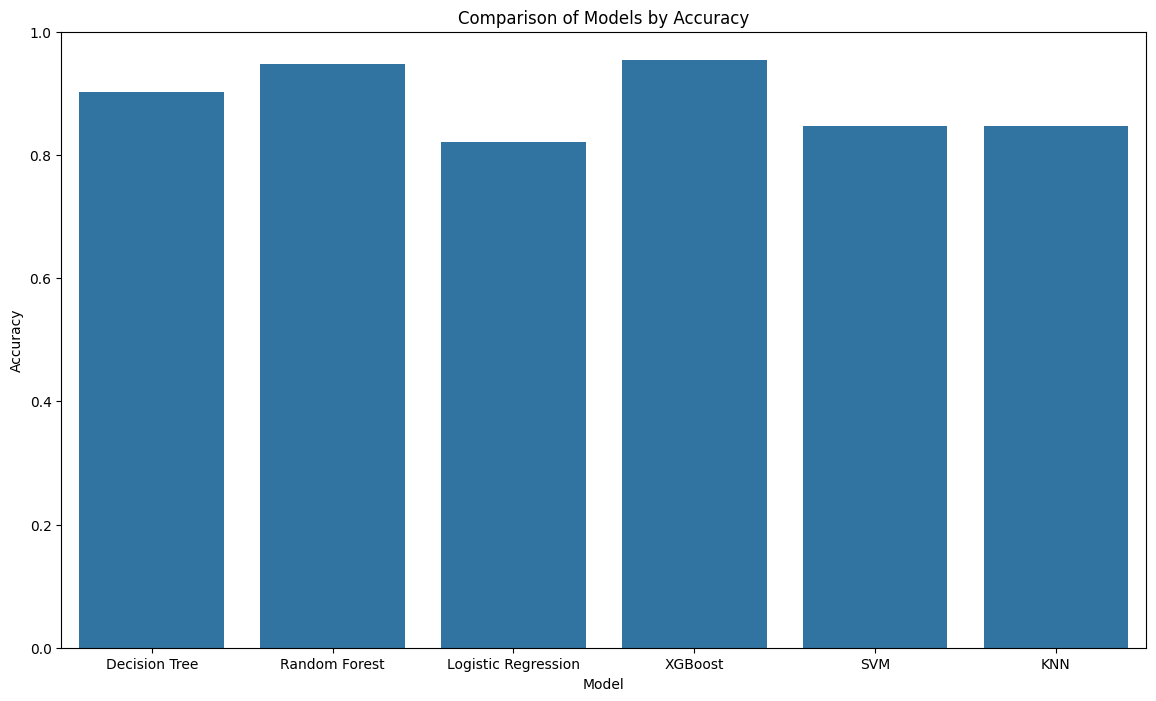

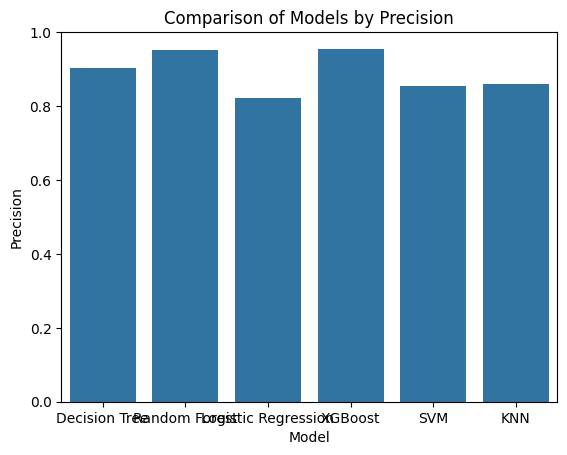

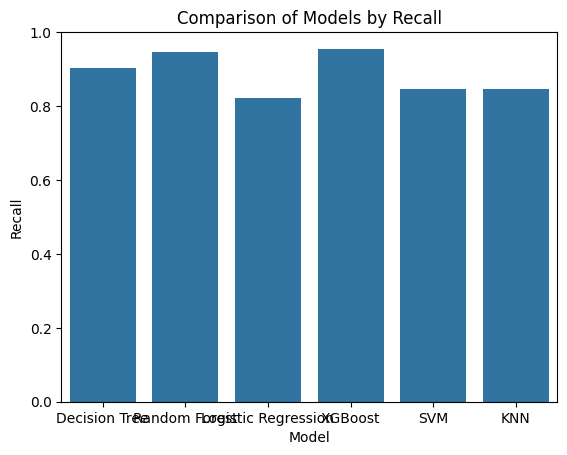

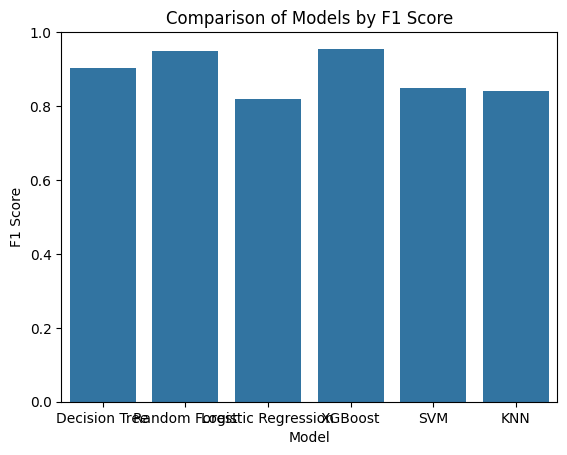

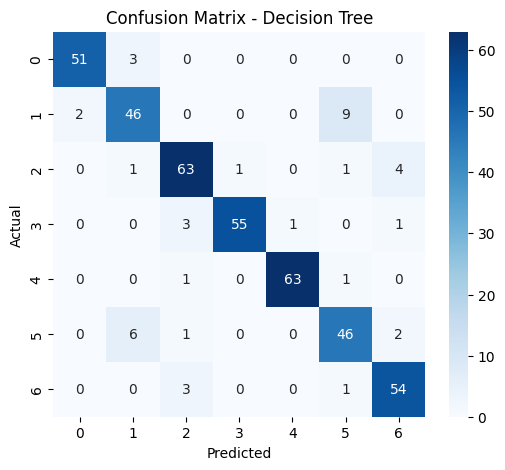

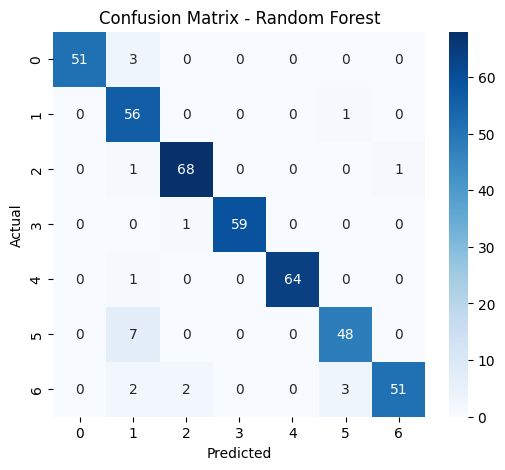

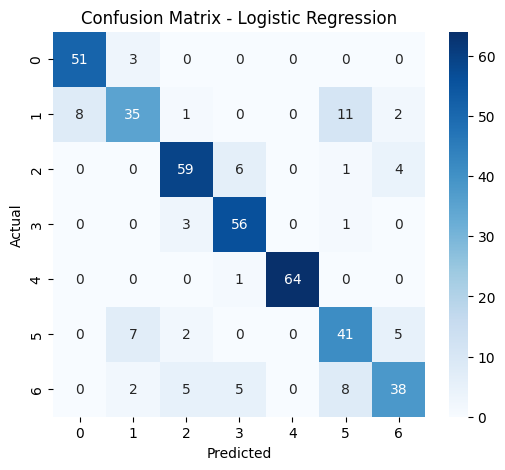

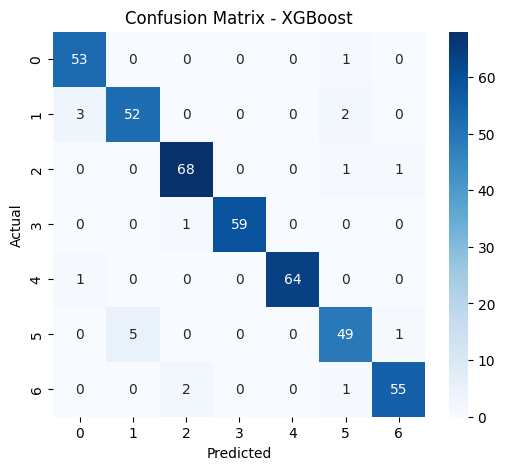

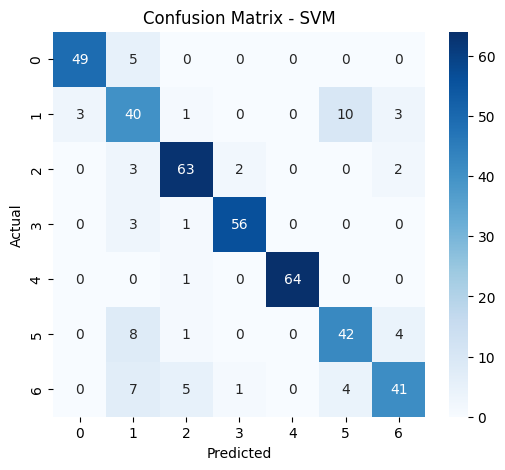

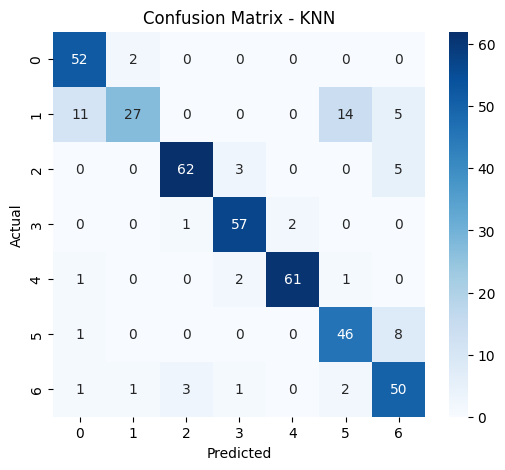

In [34]:
# Pisahkan fitur dan target
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# Split data train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling hanya untuk Logistic Regression dan SVM
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definisikan model
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Gunakan data yang sudah distandardisasi hanya untuk model tertentu
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    })

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

# Buat DataFrame hasil
results_df = pd.DataFrame(results)

# Visualisasi perbandingan performa model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(14,8))
for metric in metrics:
    sns.barplot(data=results_df, x='Model', y=metric)
    plt.title(f'Comparison of Models by {metric}')
    plt.ylim(0, 1)
    plt.show()

# Visualisasi confusion matrix
for res in results:
    plt.figure(figsize=(6,5))
    sns.heatmap(res['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {res['Model']}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Hyperparameter Tuning XGBoost dan Random Forest

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd


In [36]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, eval_metric='mlogloss')

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(xgb_model, xgb_params, cv=3, n_iter=10, n_jobs=-1, verbose=1, random_state=42)
xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print(classification_report(y_test, y_pred_xgb_tuned))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned XGBoost Accuracy: 0.9570405727923628
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.90      0.93      0.91        57
           2       0.97      0.97      0.97        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.93      0.91      0.92        55
           6       0.96      0.95      0.96        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419



In [37]:
print("Best Parameters for XGBoost:", xgb_search.best_params_)

Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [38]:
rf_model = RandomForestClassifier()

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_search = RandomizedSearchCV(rf_model, rf_params, cv=3, n_iter=10, n_jobs=-1, verbose=1, random_state=42)
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Random Forest Accuracy: 0.9498806682577565
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.81      0.96      0.88        57
           2       0.97      0.96      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.91      0.89      0.90        55
           6       0.98      0.91      0.95        58

    accuracy                           0.95       419
   macro avg       0.95      0.95      0.95       419
weighted avg       0.95      0.95      0.95       419



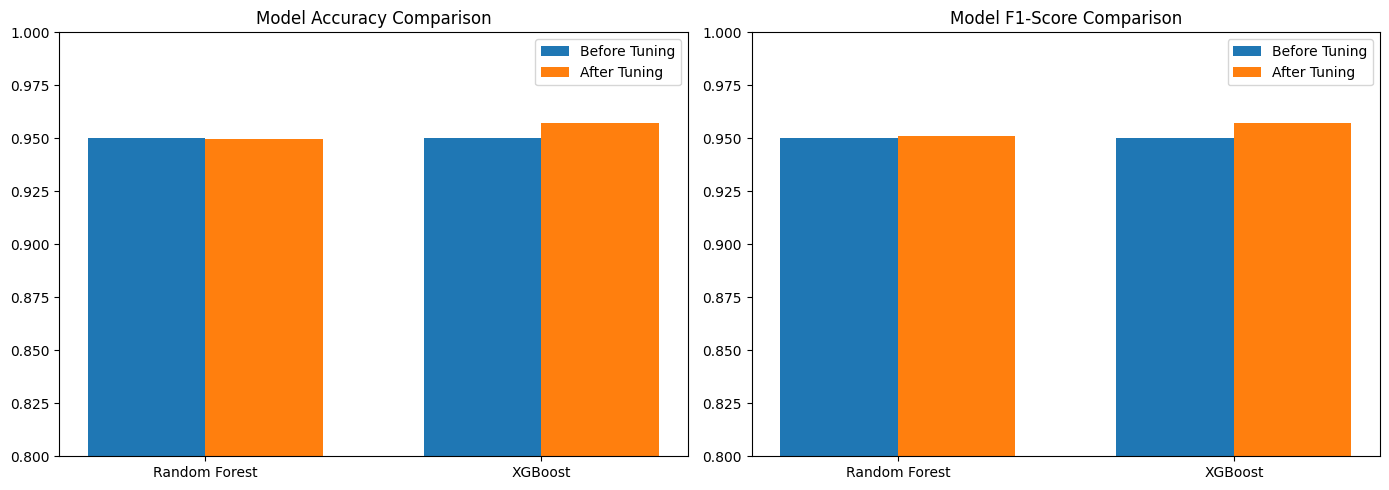

In [39]:
# Masukkan nilai accuracy/f1-score sebelum dan sesudah
model_names = ['Random Forest', 'XGBoost']
accuracy_before = [0.95, 0.95]
accuracy_after = [accuracy_score(y_test, y_pred_rf_tuned), accuracy_score(y_test, y_pred_xgb_tuned)]

f1_before = [0.95, 0.95]
f1_after = [f1_score(y_test, y_pred_rf_tuned, average='weighted'), f1_score(y_test, y_pred_xgb_tuned, average='weighted')]

# Plot
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot
ax[0].bar(x - width/2, accuracy_before, width, label='Before Tuning')
ax[0].bar(x + width/2, accuracy_after, width, label='After Tuning')
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names)
ax[0].legend()
ax[0].set_ylim(0.8, 1.0)

# F1 Score Plot
ax[1].bar(x - width/2, f1_before, width, label='Before Tuning')
ax[1].bar(x + width/2, f1_after, width, label='After Tuning')
ax[1].set_title('Model F1-Score Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names)
ax[1].legend()
ax[1].set_ylim(0.8, 1.0)

plt.tight_layout()
plt.show()


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Misal sudah ada X_train, X_test, y_train, y_test dari data kamu
# Juga model asli tanpa tuning:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],           # jumlah pohon
    'max_depth': [None, 10, 20, 30, 40],           # kedalaman pohon
    'min_samples_split': [2, 5, 10],                # minimal sampel untuk split
    'min_samples_leaf': [1, 2, 4],                  # minimal sampel di leaf node
    'max_features': ['sqrt', 'log2', None]        # fitur per split
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}


# ======= Random Forest Grid Search =======
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best parameters RF:", grid_rf.best_params_)
print("Best CV accuracy RF:", grid_rf.best_score_)

# Prediksi dengan model tuning
y_pred_rf_tuned = grid_rf.predict(X_test)
print("Classification Report RF Tuned:\n", classification_report(y_test, y_pred_rf_tuned))

Best parameters RF: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV accuracy RF: 0.9264299916990019
Classification Report RF Tuned:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.79      0.95      0.86        57
           2       0.97      0.97      0.97        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.89      0.87      0.88        55
           6       0.98      0.90      0.94        58

    accuracy                           0.95       419
   macro avg       0.95      0.94      0.94       419
weighted avg       0.95      0.95      0.95       419



In [41]:
# ======= XGBoost Grid Search =======
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best parameters XGB:", grid_xgb.best_params_)
print("Best CV accuracy XGB:", grid_xgb.best_score_)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:39:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters XGB: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1}
Best CV accuracy XGB: 0.9473680259282854


Classification Report XGB Tuned:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.87      0.95      0.91        57
           2       0.96      0.96      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.90      0.84      0.87        55
           6       0.93      0.93      0.93        58

    accuracy                           0.95       419
   macro avg       0.95      0.95      0.95       419
weighted avg       0.95      0.95      0.95       419



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:40:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


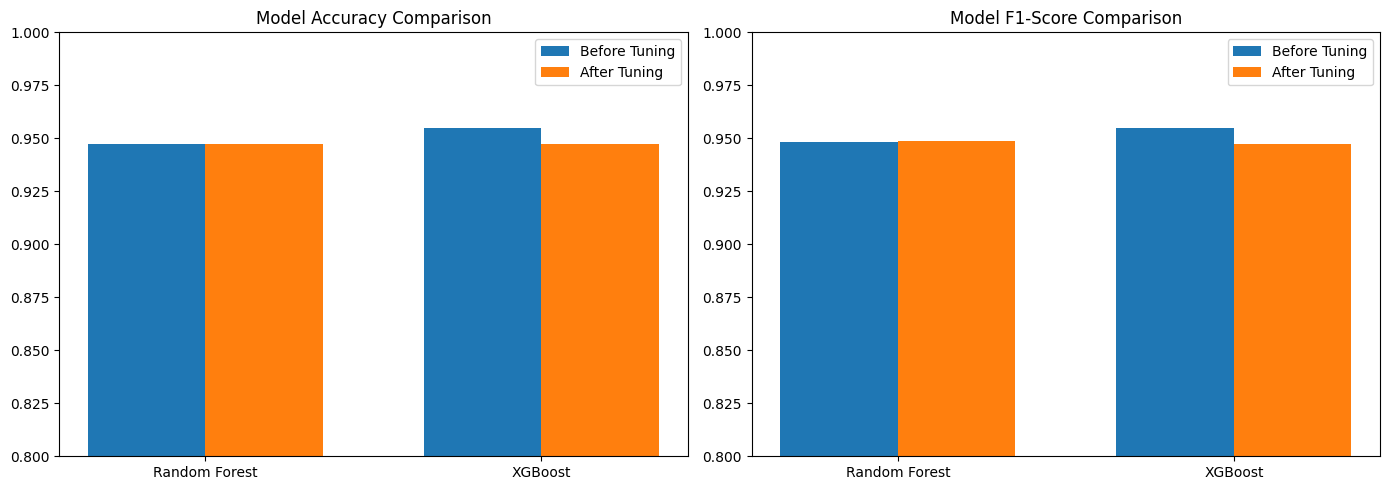

In [42]:
# Prediksi dengan model tuning
y_pred_xgb_tuned = grid_xgb.predict(X_test)
print("Classification Report XGB Tuned:\n", classification_report(y_test, y_pred_xgb_tuned))

# ======= Model asli tanpa tuning =======
rf_orig = RandomForestClassifier(random_state=42)
rf_orig.fit(X_train, y_train)
y_pred_rf_orig = rf_orig.predict(X_test)

xgb_orig = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_orig.fit(X_train, y_train)
y_pred_xgb_orig = xgb_orig.predict(X_test)

# ======= Ambil skor untuk perbandingan =======
model_names = ['Random Forest', 'XGBoost']

accuracy_before = [
    accuracy_score(y_test, y_pred_rf_orig),
    accuracy_score(y_test, y_pred_xgb_orig)
]

accuracy_after = [
    accuracy_score(y_test, y_pred_rf_tuned),
    accuracy_score(y_test, y_pred_xgb_tuned)
]

f1_before = [
    f1_score(y_test, y_pred_rf_orig, average='weighted'),
    f1_score(y_test, y_pred_xgb_orig, average='weighted')
]

f1_after = [
    f1_score(y_test, y_pred_rf_tuned, average='weighted'),
    f1_score(y_test, y_pred_xgb_tuned, average='weighted')
]

# ======= Visualisasi =======
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot
ax[0].bar(x - width/2, accuracy_before, width, label='Before Tuning')
ax[0].bar(x + width/2, accuracy_after, width, label='After Tuning')
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names)
ax[0].legend()
ax[0].set_ylim(0.8, 1.0)

# F1 Score Plot
ax[1].bar(x - width/2, f1_before, width, label='Before Tuning')
ax[1].bar(x + width/2, f1_after, width, label='After Tuning')
ax[1].set_title('Model F1-Score Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names)
ax[1].legend()
ax[1].set_ylim(0.8, 1.0)

plt.tight_layout()
plt.show()
